In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter
from scipy.stats import kde
from tqdm import tqdm

from research.datasets import AutoLoadedDataset
from research.evaluator import evaluate, stats_to_df
from research.regression import GAMFit, FCNN

In [2]:
if not os.path.exists('export'):
    os.mkdir('export')
if not os.path.exists('export/eps'):
    os.mkdir('export/eps')

plt.rcParams.update({
    "savefig.facecolor": (1, 1, 1, 1),
    "figure.figsize": (7, 4),
})

def save(fname):
    plt.savefig(f'export/gam-{fname}', dpi=300)
    plt.savefig(f'export/eps/gam-{fname}.eps', dpi=1000, format='eps')

In [3]:
loaded = AutoLoadedDataset.load(seed=0, search_path='datasets/auto')

Unable to load C:\Users\Luke Yang G1\Documents\C3001\Y2\S2\FIT2082\project\datasets/auto\17_lmpavw.arff
Unable to load C:\Users\Luke Yang G1\Documents\C3001\Y2\S2\FIT2082\project\datasets/auto\52_svmguide1.arff
Unable to load C:\Users\Luke Yang G1\Documents\C3001\Y2\S2\FIT2082\project\datasets/auto\53_fourclass_scale.arff
Unable to load C:\Users\Luke Yang G1\Documents\C3001\Y2\S2\FIT2082\project\datasets/auto\58_sarcasm_detection.arff
Unable to load C:\Users\Luke Yang G1\Documents\C3001\Y2\S2\FIT2082\project\datasets/auto\77_WorkersCompensation.arff
Unable to load C:\Users\Luke Yang G1\Documents\C3001\Y2\S2\FIT2082\project\datasets/auto\78_shill-bidding.arff
Unable to load C:\Users\Luke Yang G1\Documents\C3001\Y2\S2\FIT2082\project\datasets/auto\79_art_daily_nojump3.arff
Unable to load C:\Users\Luke Yang G1\Documents\C3001\Y2\S2\FIT2082\project\datasets/auto\80_art_daily_small_noise2.arff
Loaded 74 datasets


In [4]:
RESULTS = {}
for name, dataset in tqdm(loaded.items()):
    eval_stats = evaluate(dataset, GAMFit, retrain_on_filtered=False)
    RESULTS[name] = stats_to_df(
        eval_stats,
        [
            'target_coverage',
            'expected_coverage',
            'coverage',
            'mse_expected',
            'mse_filtered',
            'mse_prop_base',
            'comparison_loss',
        ],
        name
    )

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [05:57<00:00,  4.84s/it]


In [5]:
data = pd.concat(RESULTS.values(), ignore_index=True)
data

,dataset,target_coverage,expected_coverage,coverage,mse_expected,mse_filtered,mse_prop_base,comparison_loss
0,0_kin8nm,0.1,0.110252,0.104090,0.015682,0.022845,0.574798,0.020315
1,0_kin8nm,0.2,0.232710,0.235043,0.017759,0.022555,0.567495,0.020315
2,0_kin8nm,0.3,0.309805,0.309524,0.018788,0.023140,0.582226,0.020315
3,0_kin8nm,0.4,0.404394,0.409646,0.021361,0.025794,0.649003,0.020315
4,0_kin8nm,0.5,0.507730,0.510684,0.024089,0.027131,0.682637,0.020315
...,...,...,...,...,...,...,...,...
735,9_wine_quality,0.6,0.785330,0.804465,0.476083,0.471127,0.973158,0.386517
736,9_wine_quality,0.7,0.785330,0.804465,0.476083,0.471127,0.973158,0.386517
737,9_wine_quality,0.8,0.918954,0.923403,0.489364,0.471538,0.974008,0.386517
738,9_wine_quality,0.9,0.918954,0.923403,0.489364,0.471538,0.974008,0.386517


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


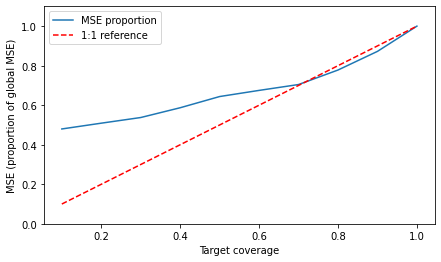

In [6]:
stats = data.groupby('target_coverage').agg({
    'mse_prop_base': 'mean'
}).reset_index().to_numpy()

plt.plot(stats[:,0], stats[:,1], label='MSE proportion')
plt.plot([0.1, 1], [0.1, 1], 'r--', label='1:1 reference')

plt.xlabel('Target coverage')
plt.ylabel('MSE (proportion of global MSE)')
plt.ylim((0, 1.1))
plt.legend()
save('coverage-proportion reference')
plt.show()

In [7]:
data.groupby('target_coverage').agg({
    'mse_prop_base': 'mean'
}).reset_index().to_numpy()

array([[0.1       , 0.4797883 ],
       [0.2       , 0.50906135],
       [0.3       , 0.53763681],
       [0.4       , 0.58712248],
       [0.5       , 0.64379529],
       [0.6       , 0.67486935],
       [0.7       , 0.70457011],
       [0.8       , 0.77794554],
       [0.9       , 0.87229806],
       [1.        , 1.        ]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


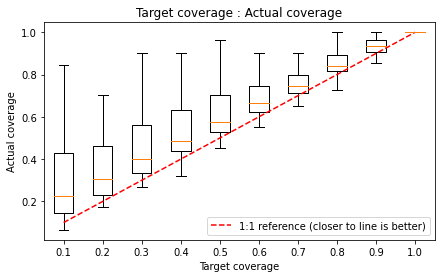

In [8]:
coverages = data.groupby('target_coverage').agg({
    'coverage': lambda x: list(x)
}).reset_index()['coverage']

plt.boxplot(coverages, showfliers=False)
plt.plot([1, 10], [0.1, 1], 'r--', label='1:1 reference (closer to line is better)')

plt.xlabel('Target coverage')
plt.ylabel('Actual coverage')
plt.title('Target coverage : Actual coverage')
plt.legend()
plt.xticks([*range(1, 11)], [f'{i/10}' for i in range (1, 11)])

save('coverage target-actual')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


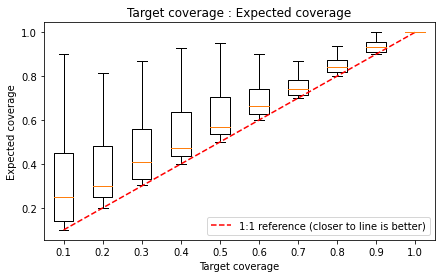

In [9]:
coverages = data.groupby('target_coverage').agg({
    'expected_coverage': lambda x: list(x)
}).reset_index()['expected_coverage']

plt.boxplot(coverages, showfliers=False)
plt.plot([1, 10], [0.1, 1], 'r--', label='1:1 reference (closer to line is better)')

plt.xlabel('Target coverage')
plt.ylabel('Expected coverage')
plt.title('Target coverage : Expected coverage')
plt.legend()
plt.xticks([*range(1, 11)], [f'{i/10}' for i in range (1, 11)])

save('coverage target-expected')
plt.show()

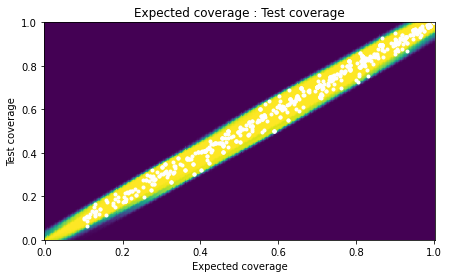

0.9960195053597637

In [10]:
x, y = data['expected_coverage'], data['coverage']

nbins = 300
k = kde.gaussian_kde([x, y])
xi, yi = np.mgrid[0:1:nbins*1j, 0:1:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, -np.exp(-2 * zi.reshape(xi.shape)), shading='auto')
plt.scatter(x, y, color=(1,1,1,1), s=9)

plt.ylim((0, 1))
plt.title('Expected coverage : Test coverage')
plt.xlabel('Expected coverage')
plt.ylabel('Test coverage')
save('expected-actual coverage heatmap')
plt.show()

x.corr(y)

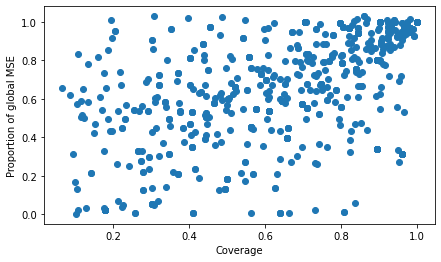

In [11]:
plt.scatter(data['coverage'], data['mse_prop_base'])

plt.xlabel('Coverage')
plt.ylabel('Proportion of global MSE')
plt.show()

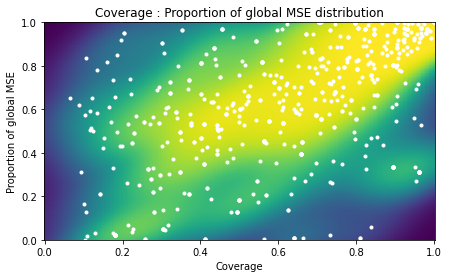

In [12]:
x, y = data['coverage'], data['mse_prop_base']
nbins = 300
k = kde.gaussian_kde([x, y])
xi, yi = np.mgrid[0:1:nbins*1j, 0:1:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, -np.exp(-2 * zi.reshape(xi.shape)), shading='auto')
plt.scatter(x, y, color=(1,1,1,1), s=9)

plt.ylim((0, 1))
plt.title('Coverage : Proportion of global MSE distribution')
plt.xlabel('Coverage')
plt.ylabel('Proportion of global MSE')
save('coverage-proportion heatmap')
plt.show()

In [13]:
data.groupby('target_coverage').agg({
    'mse_prop_base': 'mean'
})

,mse_prop_base
target_coverage,
0.1,0.479788
0.2,0.509061
0.3,0.537637
0.4,0.587122
0.5,0.643795
0.6,0.674869
0.7,0.704570
0.8,0.777946
0.9,0.872298


In [14]:
# Ones where we did well
data[np.abs(data['mse_prop_base'] / data['coverage']) < 0.05]

,dataset,target_coverage,expected_coverage,coverage,mse_expected,mse_filtered,mse_prop_base,comparison_loss
20,11_analcatdata_supreme,0.1,0.276727,0.256790,0.000019,0.000017,0.003241,0.007272
21,11_analcatdata_supreme,0.2,0.276727,0.256790,0.000019,0.000017,0.003241,0.007272
22,11_analcatdata_supreme,0.3,0.643914,0.640123,0.000033,0.000031,0.006124,0.007272
23,11_analcatdata_supreme,0.4,0.643914,0.640123,0.000033,0.000031,0.006124,0.007272
24,11_analcatdata_supreme,0.5,0.643914,0.640123,0.000033,0.000031,0.006124,0.007272
25,11_analcatdata_supreme,0.6,0.643914,0.640123,0.000033,0.000031,0.006124,0.007272
26,11_analcatdata_supreme,0.7,0.731086,0.732716,0.000114,0.000117,0.022961,0.007272
460,54_COMET_MC_SAMPLE,0.1,0.105420,0.103751,0.000016,0.000015,0.001009,0.005074
461,54_COMET_MC_SAMPLE,0.2,0.408329,0.410626,0.000056,0.000055,0.003796,0.005074
462,54_COMET_MC_SAMPLE,0.3,0.408329,0.410626,0.000056,0.000055,0.003796,0.005074


In [15]:
# Ones where we did bad
data[(data['mse_prop_base'] / data['coverage']) > 5]

,dataset,target_coverage,expected_coverage,coverage,mse_expected,mse_filtered,mse_prop_base,comparison_loss
0,0_kin8nm,0.1,0.110252,0.104090,0.015682,0.022845,0.574798,0.020315
10,10_wind,0.1,0.121166,0.134272,4.874641,7.555312,0.778946,9.878771
50,14_pm10,0.1,0.176080,0.160804,15514.376183,46005.832034,0.816587,39029.146229
80,18_no2,0.1,0.109635,0.065327,12077.007069,22389.325434,0.654244,32756.029831
81,18_no2,0.2,0.255814,0.195980,21432.632683,34597.224665,1.010973,32756.029831
160,25_fri_c1_1000_10,0.1,0.129784,0.115288,0.020733,0.040865,0.590576,0.121614
200,29_fri_c4_500_10,0.1,0.139535,0.120603,0.012979,0.061512,0.650223,0.167096
410,48_SWD,0.1,0.108153,0.087719,0.124575,0.236137,0.617701,0.457297
500,59_ilpd-numeric,0.1,0.128571,0.107296,0.016027,0.181288,0.835624,0.191887


In [16]:
# Success stories
data[(data['mse_prop_base'] < 0.2) & (data['coverage'] > 0.8)]

,dataset,target_coverage,expected_coverage,coverage,mse_expected,mse_filtered,mse_prop_base,comparison_loss
27,11_analcatdata_supreme,0.8,0.826069,0.838272,0.000273,0.000292,0.057073,0.007272
466,54_COMET_MC_SAMPLE,0.7,0.815302,0.808869,0.000141,0.000137,0.009504,0.005074
467,54_COMET_MC_SAMPLE,0.8,0.815302,0.808869,0.000141,0.000137,0.009504,0.005074


In [17]:
def plot_stats(name):
    stats = RESULTS[name]

    plt.plot(stats['coverage'], stats['mse_filtered'], marker='^', label='Actual MSE')
    plt.plot(stats['coverage'], stats['mse_expected'], marker='o', label='Predicted MSE')
    plt.axhline(stats['comparison_loss'][0], linestyle='--', color='r', label='Random forest performance')

    plt.xlabel('Coverage')
    plt.ylabel('MSE')
    plt.title(f'Predicted and actual MSE for {name}')
    plt.legend()
    save(name)
    plt.show()

Epoch 1: loss=0.5928
Epoch 2: loss=0.5219
Epoch 3: loss=0.5004
Epoch 4: loss=0.4910
Epoch 5: loss=0.4820


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


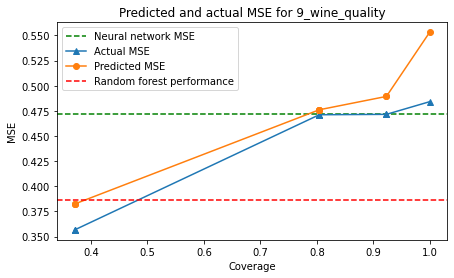

In [18]:
wines = loaded['9_wine_quality']
fitter_nn = FCNN(wines.x_train, wines.y_train, [64, 64, 64], epochs=5, device='cpu')

loss = np.square(fitter_nn.predict(wines.x_test) - np.expand_dims(wines.y_test, -1)).mean()

plt.axhline(loss, 0, 1, linestyle='--', color='g', label='Neural network MSE')

plot_stats('9_wine_quality')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


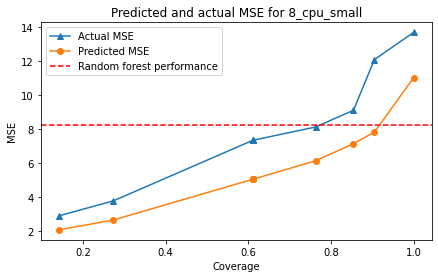

In [19]:
plot_stats('8_cpu_small')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


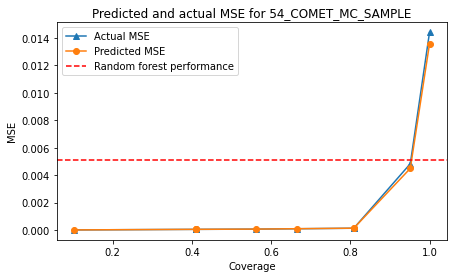

In [20]:
plot_stats('54_COMET_MC_SAMPLE')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


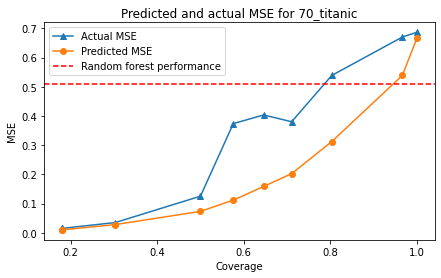

In [21]:
plot_stats('70_titanic')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


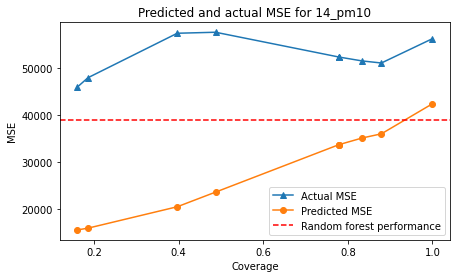

In [22]:
plot_stats('14_pm10')

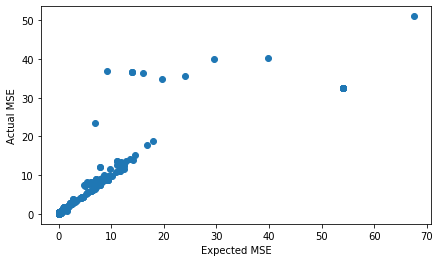

In [23]:
mask = (data['mse_expected'] < 100) & (data['mse_filtered'] < 100)

plt.scatter(data['mse_expected'][mask], data['mse_filtered'][mask])
plt.xlabel('Expected MSE')
plt.ylabel('Actual MSE')
save('expected to actual')
plt.show()

In [24]:
data['coverage'].corr(data['mse_prop_base'])

0.598770340939515

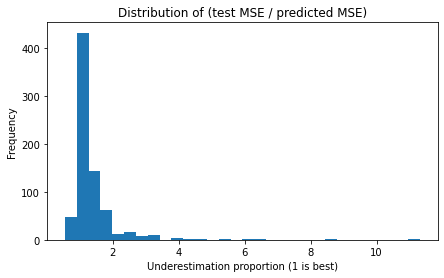

In [25]:
plt.hist(data['mse_filtered'] / data['mse_expected'], bins=30)

plt.title('Distribution of (test MSE / predicted MSE)')
plt.xlabel('Underestimation proportion (1 is best)')
plt.ylabel('Frequency')
save('underestimation dist')
plt.show()

In [26]:
ratios =  data['mse_filtered'] / data['mse_expected']
ratios.mean(), ratios.std()

(1.349393129393422, 0.7442148509245109)

In [27]:
ratios.mean() + 1.96 * ratios.std()

2.8080542372054635

In [28]:
(ratios > 1.5).mean()

0.20135135135135135